In [34]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/t-sentiments/another one.npy
/kaggle/input/wsb-data/reddit_wsb.csv
/kaggle/input/mysentiment/mysentiment.npy
/kaggle/input/d/gpreda/reddit-wallstreetsbets-posts/reddit_wsb.csv


# WSB
r/wallstreetbets, also known as WallStreetBets or WSB, is a subreddit where participants discuss stock and option trading. It has become notable for its profane nature, aggressive trading strategies, and role in the GameStop short squeeze that caused losses on short positions in U.S. firms topping US$70 billion in a few days in early 2021. The subreddit is famous for its colorful jargon and terms.

In this project we will analyze sentiment of WSB subredits.

[More info](https://en.wikipedia.org/wiki/R/wallstreetbets)

**Please note: Most of the charts are ploted by plotly, therefore GitHub will have problem with rendering.**

# Import libraries

Lets import our libraries we will work with and install some additional packages.

In [35]:
!pip install text2emotion
!pip install raceplotly

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import text2emotion as te
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from IPython.display import clear_output
import matplotlib.pyplot as plt
from raceplotly.plots import barplot
import plotly.graph_objects as go
import random

%matplotlib inline

# Lets read our data and show first lines

In [37]:
def get_random_colours(no_colors): #function to retreive random colors
    colors = []
    for i in range(no_colors):
        colors.append("#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)]))
    return colors
get_random_colours(2)

['#1686C8', '#A17B80']

In [38]:
df = pd.read_csv('../input/wsb-data/reddit_wsb.csv')
df['lenght_of_title'] = df['title'].apply(lambda x: len(x.split(' ')))
df.head()

,title,score,id,url,comms_num,created,body,timestamp,lenght_of_title
0,"It's not about the money, it's about sending a...",55,l6ulcx,https://v.redd.it/6j75regs72e61,6,1.611863e+09,NaN,2021-01-28 21:37:41,11
1,Math Professor Scott Steiner says the numbers ...,110,l6uibd,https://v.redd.it/ah50lyny62e61,23,1.611862e+09,NaN,2021-01-28 21:32:10,12
2,Exit the system,0,l6uhhn,https://www.reddit.com/r/wallstreetbets/commen...,47,1.611862e+09,The CEO of NASDAQ pushed to halt trading “to g...,2021-01-28 21:30:35,3
3,NEW SEC FILING FOR GME! CAN SOMEONE LESS RETAR...,29,l6ugk6,https://sec.report/Document/0001193125-21-019848/,74,1.611862e+09,NaN,2021-01-28 21:28:57,13
4,"Not to distract from GME, just thought our AMC...",71,l6ufgy,https://i.redd.it/4h2sukb662e61.jpg,156,1.611862e+09,NaN,2021-01-28 21:26:56,15


# Lets plot distribution of title length

In [39]:
trace = go.Histogram(x=df['lenght_of_title'],
                    xbins=dict(end=80)
    )

data = [trace]
layout = dict(title = 'Frequency of title lenght',
              xaxis= dict(title= 'Length'),
              yaxis = dict(title='Count'),
              plot_bgcolor='rgba(0,0,0,0)'
             )
fig = go.Figure(data=data, layout=layout)
fig.show()


As we can see the most of the post have length between 0-20.

# Lets get our emotions using text2emotion package
* text2emotion is the python package which will help you to extract the emotions from the content. Processes any textual message and recognize the emotions embedded in it. Compatible with 5 different emotion categories as Happy, Angry, Sad, Surprise and Fear.

[More info](https://pypi.org/project/text2emotion/)


In [40]:
# t=[]
# count=0
# for i in df['title'].values:
#     count+=1
#     print(count)
#     clear_output(wait=True)
#     t.append(te.get_emotion(i))
# t=np.array(t)
# t

In [41]:
# np.save('mysentiment.npy',t)

In [42]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
week_day = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
days_orde = list(week_day.values())

df['Weekday'] = df['timestamp'].apply(lambda x: week_day[x.weekday()]) #give us exact day in the week
df.head()

,title,score,id,url,comms_num,created,body,timestamp,lenght_of_title,Weekday
0,"It's not about the money, it's about sending a...",55,l6ulcx,https://v.redd.it/6j75regs72e61,6,1.611863e+09,NaN,2021-01-28 21:37:41,11,Thursday
1,Math Professor Scott Steiner says the numbers ...,110,l6uibd,https://v.redd.it/ah50lyny62e61,23,1.611862e+09,NaN,2021-01-28 21:32:10,12,Thursday
2,Exit the system,0,l6uhhn,https://www.reddit.com/r/wallstreetbets/commen...,47,1.611862e+09,The CEO of NASDAQ pushed to halt trading “to g...,2021-01-28 21:30:35,3,Thursday
3,NEW SEC FILING FOR GME! CAN SOMEONE LESS RETAR...,29,l6ugk6,https://sec.report/Document/0001193125-21-019848/,74,1.611862e+09,NaN,2021-01-28 21:28:57,13,Thursday
4,"Not to distract from GME, just thought our AMC...",71,l6ufgy,https://i.redd.it/4h2sukb662e61.jpg,156,1.611862e+09,NaN,2021-01-28 21:26:56,15,Thursday


# Lets plot number of posts for each day in the week

In [43]:
import plotly.graph_objects as go
colors = ['#636EFA', '#EF553B', '#00CC96', '#AB63FA', '#FFA15A', '#19D3F3', '#FF6692']

trace = go.Bar(x=df['Weekday'].value_counts().index,
              y= df['Weekday'].value_counts(),
              marker_color=colors)

data = [trace]
layout = dict(title='Number of post for each day',xaxis=dict(title='Day',categoryorder='array', categoryarray= days_orde),
              yaxis = dict(title='Number of posts'),
              height=500,
              width=1000,
              plot_bgcolor='rgba(0,0,0,0)')

fig = go.Figure(data=data, layout = layout)
fig.show()

In [44]:
t = np.load('../input/mysentiment/mysentiment.npy',allow_pickle = True)

# Create new columns with sentiment

In [45]:
df['overall_text'] = df['title'] + " " + df['body'].astype('str')
df['Happy'] = [i['Happy'] for i in t]
df['Angry'] = [i['Angry'] for i in t]
df['Surprise'] = [i['Surprise'] for i in t]
df['Sad'] = [i['Sad'] for i in t]
df['Fear'] = [i['Fear'] for i in t]


In [46]:
dominant = [] #we will retrieve MAX (dominant) sentiment for each row
for i in t:
    keymax = max(i, key=i.get)
    dominant.append(keymax)

In [47]:
import datetime as dt
df['emotion'] = dominant
df['timestamp2'] = df['timestamp'].dt.strftime("%Y/%m/%d")
df.head(2)


,title,score,id,url,comms_num,created,body,timestamp,lenght_of_title,Weekday,overall_text,Happy,Angry,Surprise,Sad,Fear,emotion,timestamp2
0,"It's not about the money, it's about sending a...",55,l6ulcx,https://v.redd.it/6j75regs72e61,6,1.611863e+09,NaN,2021-01-28 21:37:41,11,Thursday,"It's not about the money, it's about sending a...",0.0,0.00,0.00,0.00,1.00,Fear,2021/01/28
1,Math Professor Scott Steiner says the numbers ...,110,l6uibd,https://v.redd.it/ah50lyny62e61,23,1.611862e+09,NaN,2021-01-28 21:32:10,12,Thursday,Math Professor Scott Steiner says the numbers ...,0.0,0.25,0.25,0.25,0.25,Angry,2021/01/28


# Emotions over time

For this case we will use race plot, to visualize how sentiment was chaning over time.

In [48]:
# df.groupby('timestamp')[['emotion']].agg('count').drop('2020/09/29',axis=0)
df_modified = pd.pivot_table(data = df, index='timestamp2',columns='emotion', aggfunc='count').drop('2020/09/29',axis=0)
df_modified.columns = df_modified.columns.get_level_values(0)
df_modified = df_modified.iloc[:,:5]
df_modified.columns = ['Angry','Fear','Happy','Sad','Surprise']
df_modified
df_modified = df_modified.reset_index()
df_modified = df_modified.melt(id_vars='timestamp2',var_name = 'Sentiment', value_name='Posts')

colors = {'Angry': 'rgb(242,250,253)',
          'Fear': 'rgb(162,193,236)',
          'Happy': 'rgb(120,160,207)',
          'Sad':'rgb(110,119,189)',
          'Surprise':'rgb(69,82,109)'}

df_modified['color'] = df_modified['Sentiment'].map(colors)

In [49]:
from raceplotly.plots import barplot

# trace = go.Bar(x=df_modified['variable'],
#               y=df_modified['value'])
# data = [trace]

# fig = go.Figure(data=data)
# fig.show()


my_raceplot = barplot(df_modified,
                      item_column='Sentiment',
                      value_column='Posts',
                      time_column='timestamp2',
                      item_color='color'

                     )

my_raceplot.plot(title = 'Daily emotion count',
                 item_label = 'Emotions',
                 value_label = 'Post count',
                 frame_duration = 600
                )

As we can see the bigest number of emotions are as of 29/01/2021. Lets have a look at this day'

In [50]:
df_modified2 = df.loc[(df['timestamp2'] == '2021/01/29') | (df['timestamp2'] == '2021/01/28')]
df_modified2['timestamp3'] = df_modified2['timestamp'].dt.strftime("%Y/%m/%d, %H")

df_modified2 = pd.pivot_table(data = df_modified2, index='timestamp3',columns='emotion', aggfunc='count')
df_modified2.columns = df_modified2.columns.get_level_values(0)
df_modified2 = df_modified2.iloc[:,:5]
df_modified2.columns = ['Angry','Fear','Happy','Sad','Surprise']
df_modified2
df_modified2 = df_modified2.reset_index()
df_modified2 = df_modified2.melt(id_vars='timestamp3',var_name = 'Sentiment', value_name='Posts')


colors = {'Angry': 'rgb(242,250,253)',
          'Fear': 'rgb(162,193,236)',
          'Happy': 'rgb(120,160,207)',
          'Sad':'rgb(110,119,189)',
          'Surprise':'rgb(69,82,109)'}

df_modified2['color'] = df_modified2['Sentiment'].map(colors)

my_raceplot = barplot(df_modified2,
                      item_column='Sentiment',
                      value_column='Posts',
                      time_column='timestamp3',
                      item_color='color'

                     )

my_raceplot.plot(title = 'Emotion count during the 2021/01/29',
                 item_label = 'Emotions',
                 value_label = 'Post count',
                 frame_duration = 600
                )

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



# Most common URL domains shared

In [51]:
import re
text = []
df['extracted_url'] = df['url'].str.extract(r'https:\/\/*(.*\.\w+)\/') 
x = df['extracted_url'].value_counts().sort_values(ascending=False)[:6].index
y = df['extracted_url'].value_counts().sort_values(ascending=False)[:6]

In [52]:
colors = ['#636EFA', '#EF553B', '#00CC96', '#AB63FA', '#FFA15A', '#19D3F3']

trace = go.Bar(x=x,
              y=y,
              marker_color=colors)

data = [trace]
layout = dict(title='The most common URL domains shares',xaxis=dict(title='URL'),
              yaxis = dict(title='Number of URLs'),
              height=500,
              width=1000,
              plot_bgcolor='rgba(0,0,0,0)')

fig = go.Figure(data=data, layout = layout)
fig.show()

# Relationship between emotion and number of comments

In [53]:
df.groupby('emotion')['comms_num'].agg('sum')
colors = ['#636EFA', '#EF553B', '#00CC96', '#AB63FA', '#FFA15A']

trace = go.Bar(x=df.groupby('emotion')['comms_num'].agg('sum').index,
              y=df.groupby('emotion')['comms_num'].agg('sum'),
              marker_color=colors)

data = [trace]
layout = dict(title='Number of comments in each emotion',xaxis=dict(title='Sentiment'),
              yaxis = dict(title='Number of comments'),
              height=500,
              width=1000,
              plot_bgcolor='rgba(0,0,0,0)')

fig = go.Figure(data=data, layout = layout)
fig.show()

In [54]:
table = df.groupby('emotion')['comms_num'].agg('sum').reset_index().sort_values('comms_num', ascending=False)
table.style.background_gradient(cmap='Blues')

,emotion,comms_num
2,Happy,6039079
1,Fear,912508
4,Surprise,595247
3,Sad,450476
0,Angry,263762


In [55]:
trace = go.Funnelarea(text = df.groupby('emotion')['comms_num'].agg('sum').sort_values(ascending=False).index,
                     values = df.groupby('emotion')['comms_num'].agg('sum').sort_values(ascending=False),
                     title = {'position':'top center','text':'Funnel-Chart Sentiment Distribution'},
                     )
data = [trace]
# layout = dict(showlegend=False)
fig = go.Figure(data=data)
fig.show()

Most of the people shared happines in their comment :)

In [56]:
df.groupby('emotion')['score'].agg('mean')
colors = ['#636EFA', '#EF553B', '#00CC96', '#AB63FA', '#FFA15A']

trace = go.Bar(x=df.groupby('emotion')['score'].agg('mean').index,
              y=df.groupby('emotion')['score'].agg('mean'),
              marker_color=colors,
)

data = [trace]
layout = dict(title='Number of comments in each emotion',xaxis=dict(title='Sentiment'),
              yaxis = dict(title='Number of comments'),
              height=500,
              width=1000,
              plot_bgcolor='rgba(0,0,0,0)')

fig = go.Figure(data=data, layout = layout)
fig.show()

Score is almost the same for every emotion but an angry comment. But angry sentiment has the biggest score.

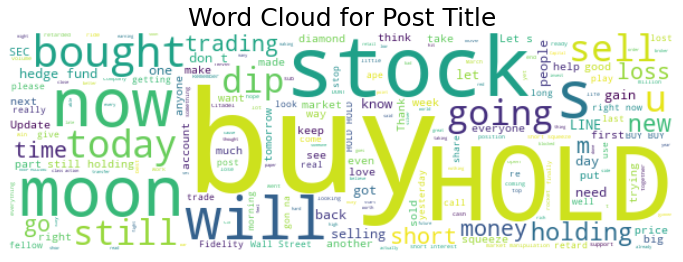

In [57]:
from nltk import word_tokenize, corpus

english_words = set(corpus.words.words())
word_tokens = [word_tokenize(text) for text in df['title']]

word_cloud_string = ""

for word_list in word_tokens:
    for word in word_list:
        if word.lower() in english_words:
            word_cloud_string += word + " "
        
# Updating some of the Words into Stopwords 
description_stopwords = set(STOPWORDS)

my_word_cloud = WordCloud(background_color='white',stopwords=description_stopwords, width=600, margin=5).generate(word_cloud_string)
plt.figure(figsize=(12,30))
plt.imshow(my_word_cloud, interpolation='bilinear')
plt.title("Word Cloud for Post Title", fontsize=25)
plt.axis('off')
plt.show()

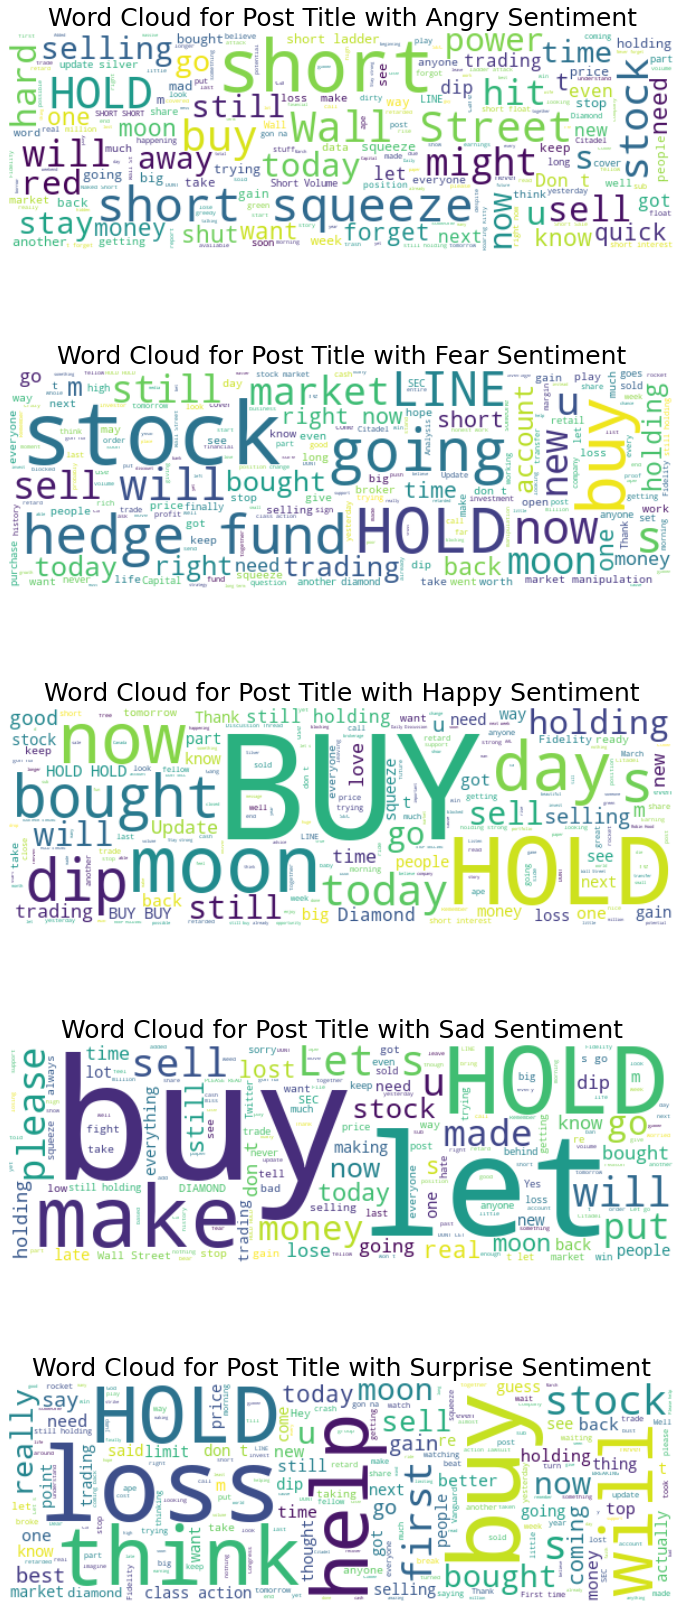

In [58]:
fig, (axis1, axis2, axis3, axis4, axis5) = plt.subplots(5, 1, figsize=(12,30))

axes = [axis1, axis2, axis3, axis4, axis5]
sentiments = ['Angry', 'Fear', 'Happy','Sad','Surprise']

for i in range(len(sentiments)):
    word_tokens = [word_tokenize(text) for text in df.loc[df['emotion'] == sentiments[i],'title']] #for each emotion give me tokenized title
    
    word_cloud_string = ""
    
    for word_list in word_tokens:
        for word in word_list:
            if word.lower() in english_words: #english_words = set(corpus.words.words())
                word_cloud_string += word + " "
    
    description_stopwords = set(STOPWORDS)

    my_word_cloud = WordCloud(background_color='white',stopwords=description_stopwords, width=600, margin=5).generate(word_cloud_string)
    axes[i].imshow(my_word_cloud, interpolation='bilinear')
    axes[i].set_title(f"Word Cloud for Post Title with {sentiments[i]} Sentiment", fontsize=25)
    axes[i].axis('off')


plt.show()


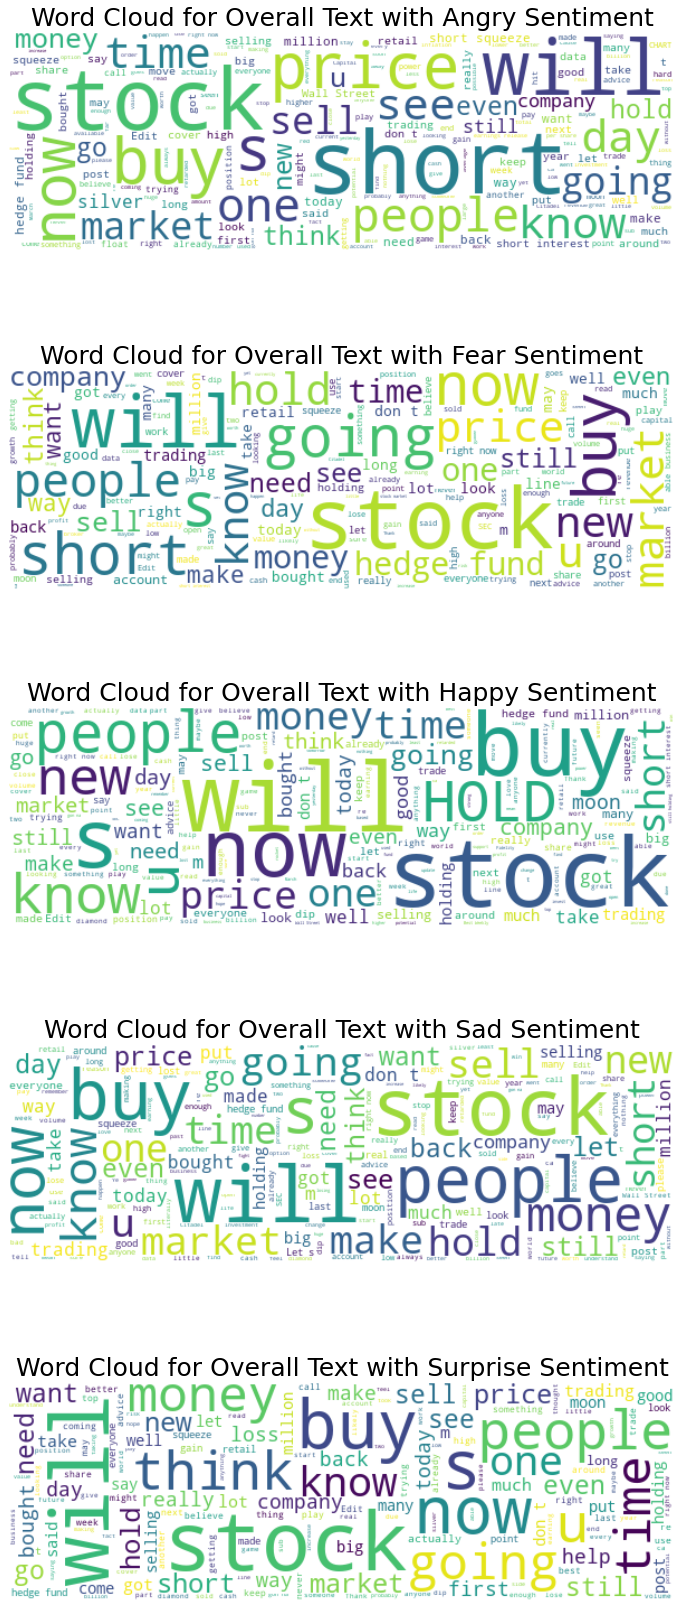

In [59]:
fig, (axis1, axis2, axis3, axis4, axis5) = plt.subplots(5, 1, figsize=(12,30))

axes = [axis1, axis2, axis3, axis4, axis5]
sentiments = ['Angry', 'Fear', 'Happy','Sad','Surprise']

for i in range(len(sentiments)):
    word_tokens = [word_tokenize(text) for text in df.loc[df['emotion'] == sentiments[i],'overall_text']] #for each emotion give me tokenized title
    word_cloud_string = ""
    
    for word_list in word_tokens:
        for word in word_list:
            w= word.replace('nan',' ')
            if w.lower() in english_words: #english_words = set(corpus.words.words())
                word_cloud_string += w + " "
    
    description_stopwords = set(STOPWORDS)

    my_word_cloud = WordCloud(background_color='white',stopwords=description_stopwords, width=600, margin=5).generate(word_cloud_string)
    axes[i].imshow(my_word_cloud, interpolation='bilinear')
    axes[i].set_title(f"Word Cloud for Overall Text with {sentiments[i]} Sentiment", fontsize=25)
    axes[i].axis('off')


plt.show()


# Lets analyze happy sentiment separately

In [60]:
df_happy = df.loc[df['emotion'] == 'Happy',['title','url','body','overall_text']]
df_happy.head()

,title,url,body,overall_text
11,GME Premarket 🍁 Musk approved 🎮🛑💎✋,https://i.redd.it/48rmgz5c42e61.png,NaN,GME Premarket 🍁 Musk approved 🎮🛑💎✋ nan
14,I Love You Retards!!!!,https://www.reddit.com/gallery/l6u8hc,NaN,I Love You Retards!!!! nan
15,420 wasn’t a meme. GME 🚀 🚀 🚀,https://i.redd.it/7z279wtz32e61.jpg,NaN,420 wasn’t a meme. GME 🚀 🚀 🚀 nan
19,"Daily Discussion Thread for January 28, 2021",https://www.reddit.com/r/wallstreetbets/commen...,Your daily trading discussion thread. Please k...,"Daily Discussion Thread for January 28, 2021 Y..."
20,GME 420.69 Pre-Market. Repeat after me: $1000 ...,https://i.redd.it/vchdti7v02e61.jpg,NaN,GME 420.69 Pre-Market. Repeat after me: $1000 ...


In [61]:
import re
import string
def clean_text(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [62]:
df_happy['cleaned'] = df_happy['title'].apply(lambda x: clean_text(x))

# Most common word in happy sentiment

In [63]:
from collections import Counter
df_happy['cleaned_list'] = df_happy['cleaned'].apply(lambda x: str(x).split())
top = Counter([w for w_list in df_happy['cleaned_list'] for w in w_list])
top = pd.DataFrame(top.most_common(20))[:10]
top.columns = ['Common_words','count']
top.style.background_gradient(cmap='Blues')




,Common_words,count
0,the,5293
1,to,3910
2,gme,3273
3,and,2316
4,is,2274
5,i,2250
6,a,1940
7,buy,1781
8,you,1761
9,on,1687


## We have to remove STOPWORDS!!!

In [64]:
description_stopwords = set(STOPWORDS)

def delete_stopwords(x):
    return [w for w in x if w not in STOPWORDS] #description_words = set(STOPWORDS)
df_happy['cleaned_list'] = df_happy['cleaned_list'].apply(lambda x: delete_stopwords(x))
top = Counter([w for w_list in df_happy['cleaned_list'] for w in w_list])
top = pd.DataFrame(top.most_common(20))[:10]
top.columns = ['Common_words','count']
top.style.background_gradient(cmap='Blues')

,Common_words,count
0,gme,3273
1,buy,1781
2,hold,1476
3,amc,1419
4,robinhood,1285
5,holding,926
6,fucking,758
7,still,754
8,moon,705
9,fuck,658


In [65]:
top = top.sort_values('count',ascending=True)[:10]
trace = go.Bar(y=top['Common_words'],
              x= top['count'],
              orientation = 'h',
              marker_color = px.colors.sequential.RdBu)

layout = dict(title='Most frequent words in happy sentiment',xaxis=dict(title='count'),
              yaxis = dict(title='Words'),
              height=500,
              width=1000,
              plot_bgcolor='rgba(0,0,0,0)')
data = [trace]
fig = go.Figure(data=data, layout=layout)
fig.show()


In [66]:
fig = px.treemap(top, path=['Common_words'], values='count', title='Tree of the most common words in happy sentiment')
fig.show()

# END!!!